In [2]:
import pandas as pd

# Load generation and weather data
gen_df = pd.read_csv("Plant_1_Generation_Data.csv")
weather_df = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

# Convert datetime columns
gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'], format='%d-%m-%Y %H:%M')
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Merge datasets on DATE_TIME and PLANT_ID
df = pd.merge(gen_df, weather_df, on=['DATE_TIME', 'PLANT_ID'])

# Extract useful time features
df['HOUR'] = df['DATE_TIME'].dt.hour


In [3]:
# Choose input features and target
features = ['IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'HOUR']
target = 'DC_POWER'

X = df[features]
y = df[target]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 220188.80
R² Score: 0.99


In [5]:
import joblib
joblib.dump(model, 'solar_model.pkl')


['solar_model.pkl']

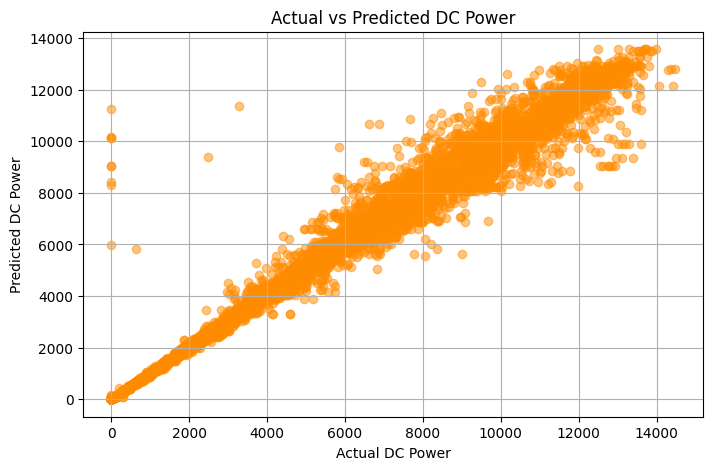

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='darkorange')
plt.xlabel("Actual DC Power")
plt.ylabel("Predicted DC Power")
plt.title("Actual vs Predicted DC Power")
plt.grid(True)
plt.show()


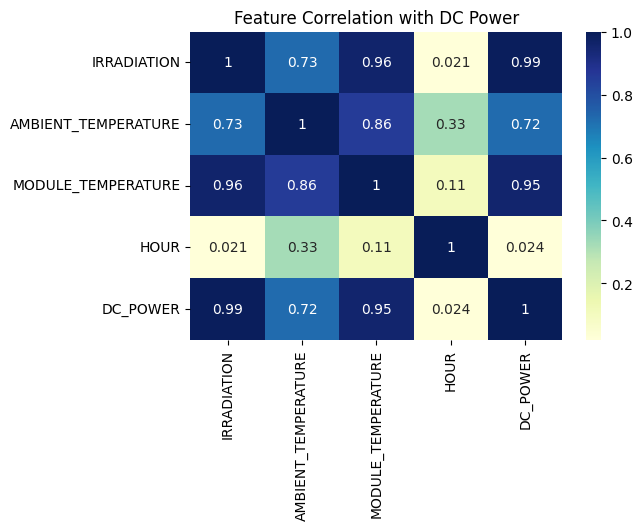

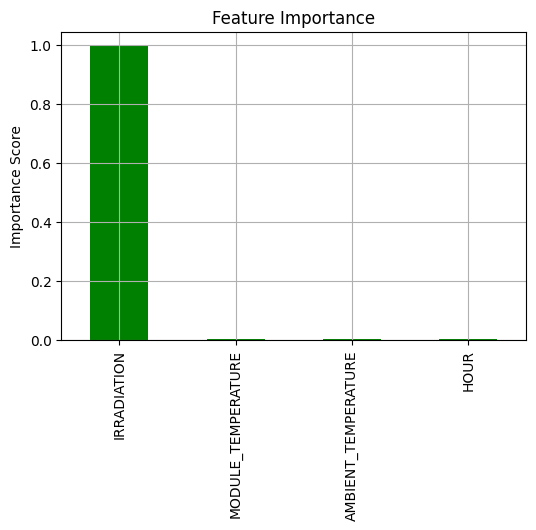

In [7]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation with DC Power")
plt.show()

# Feature importance
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
feat_imp.plot(kind='bar', color='green')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.grid(True)
plt.show()
